# Phased Analysis

Fermipy provides several options to support analysis with selections on pulsar phase. The following example assume that you already have a phased FT1 file that contains a PULSE_PHASE column with the pulsar phase for each event.

The following example illustrates the settings for the gtlike and selection sections of the configuration file that would be used for a single-component ON- or OFF-phase analysis:

The gtlike.expscale parameter defines the correction that should be applied to the nominal exposure to account for the phase selection defined by selection.phasemin and selection.phasemax. Normally this should be set to the size of the phase selection interval.

To perform a joint analysis of multiple phase selections you can use the components section to define separate ON- and OFF-phase components:

The src_expscale parameter can be used to define an exposure correction for indvidual sources. In this example it is used to zero the pulsar component for the OFF-phase selection.

We apply the example below to Geminga PSR. We take the phased ft1 in the folder /u/gl/mdwood/fermi/ext_analysis/v14/geminga/ft1/ft1_00.fits

First of all let's import the following packages.

In [20]:
from fermipy import utils
from fermipy.gtanalysis import GTAnalysis
import argparse
from fermipy.castro import CastroData
from fermipy.plotting import ROIPlotter, SEDPlotter
import astropy.io.fits as pyfits
from math import *
import matplotlib.pyplot as pl
utils.init_matplotlib_backend()
import numpy as np
from scipy.integrate import quad
from IPython.display import Image

# Combined Off and on phase analysis

We will use the configuration file named as config_phase_combined.yaml where we will make a joint analysis of the off and on-phase components. We use the configuration file reported below.

We choose for the off-phase analysis (src_expscale : {'3FGL J0633.9+1746':0.0) the values phasemax: 1.0 phasemin: 0.75 because this is the range of data that is off-phase. In order to see this let's use the following script.

[ 2229  2221  2277  2388  2568  2932  3601  4618  5946  7349  7789  7050
  6058  5212  4428  4040  3725  3516  3347  3435  3299  3161  3274  3256
  3290  3375  3272  3383  3367  3475  3471  3495  3517  3449  3511  3619
  3779  3869  3676  3777  3868  3899  3877  3992  3933  3972  4040  3994
  4050  4034  4140  4308  4316  4741  5318  6126  7798 10115 12821 15209
 15882 14200 10479  7150  5467  4508  3664  3271  2943  2810  2528  2506
  2567  2354  2370  2271  2342  2286  2275  2318  2227  2192  2209  2139
  2057  2057  2064  2091  2032  2129  2051  2053  2068  2051  2104  2061
  2196  2054  2106  2150]


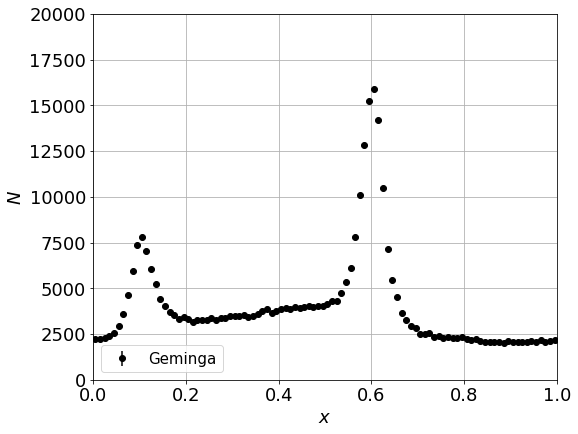

In [16]:
table = pyfits.open('/u/gl/mdwood/fermi/ext_analysis/v14/geminga/ft1/ft1_00.fits')
#table = pyfits.open('/nfs/farm/g/glast/g/pulsar/3rdPulsarCatalog/datasets/J0534+2200_15p0deg_20MeV_1000000MeV_105deg_128_3.fits')

tabledata = table[1].data 
phasevec = tabledata.field('PULSE_PHASE')

phase_bins = np.arange(0.,1.01,0.01)
phase_val = np.arange(0.+0.005,1.0,0.01)
histo_phase = np.histogram(phasevec,phase_bins)

fig = pl.figure(figsize=(8,6))
pl.errorbar(phase_val, histo_phase[0], yerr=np.sqrt(histo_phase[0]), fmt="o", color="black",label="Geminga")
pl.ylabel(r'$N$', fontsize=18)
pl.xlabel(r'$x$', fontsize=18)
pl.axis([0.,1.0,0.0,2.0e4], fontsize=18)
pl.xticks(fontsize=18)
pl.yticks(fontsize=18)
pl.grid(True)
pl.yscale('linear')
pl.xscale('linear')
pl.legend(loc=3,prop={'size':15},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
pl.savefig("phase_Geminga.png")

Looking to the phase plot above we choose to consider the data between x=0.75 and x=1 for the off-phase component. On the opposite side we choose for the on-phase the range 0.55-0.65.

In [4]:
gta = GTAnalysis('config_phase_combined.yaml')
gta.setup()

2018-04-01 09:19:41 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.16.0+175.ge34f 
ScienceTools version ScienceTools-11-07-00
2018-04-01 09:19:43 INFO    GTAnalysis.setup(): Running setup.
2018-04-01 09:19:43 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2018-04-01 09:19:43 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2018-04-01 09:19:43 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/u/gl/mdwood/fermi/ext_analysis/v14/geminga/ft1/ft1_00.fits outfile=/nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/outdir/ft1_00.fits ra=98.4792422866 dec=17.7729262566 rad=8.98528137424 tmin=239557414.0 tmax=476239414.0 emin=1000.0 emax=500000.0 zmin=0.0 zmax=105.0 evclass=128 evtype=3 convtype=-1 phasemin=0.7 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2018-04-01 09:19:45 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect v

2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named galdiff
2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0605.9+2039c....................!
2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0609.2+2051c....................!
2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0610.6+1728....................!
2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0611.5+1957....................!
2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0619.4+2242....................!
2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0626.8+1743....................!
2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 3FGL J0631.2+2019....................!
2018-04-01 09:22:52 INFO    GTBinnedAnalysis.run_gtapp()

2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): This is gtsrcmaps version ScienceTools-11-07-00
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): Using evtype=3 (i.e., FRONT/BACK irfs)
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): ResponseFunctions::load: IRF used: P8R2_SOURCE_V6
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): event_types:  0  1
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0633.9+1746
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0626.8+1743
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0631.2+2019
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0647.8+1751
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0648.1+1606
2018-04-01 09:26:02 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 3FGL J0648.8+1516
2018-04-01 09:26:02 INFO

In [5]:
gta.print_model()

2018-04-01 09:26:52 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.001   2.976   0.00151   3.12       nan    205547.6     
3FGL J0626.8+1743      1.684   2.300  1.69e-06   2.70       nan        83.9     
3FGL J0631.2+2019      2.634   0.529  1.98e-06   2.46       nan        79.3     
3FGL J0647.8+1751      3.317   2.178   9.8e-07   2.70       nan        48.3     
3FGL J0648.1+1606      3.792   0.431   2.6e-06   1.77       nan        29.5     
3FGL J0648.8+1516      4.358   1.092  1.36e-05   1.83       nan       175.4     
3FGL J0650.5+2055      5.040   0.802  8.51e-06   1.56       nan        54.3     
3FGL J0610.6+1728      5.547   0.522  2.26e-06   4.85       nan       167.5     
3FGL J0611.5+1957      5.715   0.967  4.01e-06   2.38       nan       144.0     
3FGL J0619.4+2242      5.981   0.381   8.4e-06   2.01 

Now we perform a first fit to the ROI.

In [6]:
gta.free_sources()
gta.optimize()

2018-04-01 09:27:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0633.9+1746     : ['Prefactor', 'Index1', 'Cutoff']
2018-04-01 09:27:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0626.8+1743     : ['Prefactor', 'Index']
2018-04-01 09:27:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0631.2+2019     : ['Prefactor', 'Index']
2018-04-01 09:27:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0647.8+1751     : ['Prefactor', 'Index']
2018-04-01 09:27:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0648.1+1606     : ['Prefactor', 'Index']
2018-04-01 09:27:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0648.8+1516     : ['Prefactor', 'Index']
2018-04-01 09:27:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0650.5+2055     : ['Prefactor', 'Index']
2018-04-01 09:27:24 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0610.6+1728     : ['norm', 'alpha', 'b

Joint fit  ['3FGL J0633.9+1746', 'galdiff']


/u/gl/mdimauro/kipac/software/anaconda/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 3FGL J0633.9+1746 TS: 793613.853
Fitting shape galdiff TS: 192098.122
Fitting shape 3FGL J0619.4+2242 TS:   1838.695
Fitting shape 3FGL J0648.8+1516 TS:    304.537
Fitting shape isodiff TS:    250.232
Fitting shape 3FGL J0650.5+2055 TS:     63.355
Fitting shape 3FGL J0626.8+1743 TS:     58.275


2018-04-01 09:27:39 INFO    GTAnalysis.optimize(): Finished
2018-04-01 09:27:39 INFO    GTAnalysis.optimize(): LogLike: 95103.493879 Delta-LogLike: 47764.287445
2018-04-01 09:27:39 INFO    GTAnalysis.optimize(): Execution time: 14.56 s


{'config': {'max_free_sources': 5,
  'npred_frac': 0.95,
  'npred_threshold': 1.0,
  'optimizer': {'init_lambda': 0.0001,
   'max_iter': 100,
   'min_fit_quality': 2,
   'optimizer': 'MINUIT',
   'retries': 3,
   'tol': 0.001,
   'verbosity': 0},
  'shape_ts_threshold': 25.0,
  'skip': []},
 'dloglike': 47764.28744506446,
 'loglike0': 47339.20643416565,
 'loglike1': 95103.49387923011}

Then, we delete sources with TS<16.

In [8]:
gta.print_model()
gta.delete_sources(minmax_ts=[None,16])

2018-04-01 09:28:17 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.001   0.923  0.000703   2.75 891626.42     85450.7    *
3FGL J0626.8+1743      1.684  52.761  5.29e-06   5.00    132.27       488.7    *
3FGL J0631.2+2019      2.634   0.222   8.3e-07   2.46      5.24        33.3    *
3FGL J0647.8+1751      3.317   0.000   7.1e-11   2.70     -0.00         0.0    *
3FGL J0648.1+1606      3.792   0.054  3.24e-07   1.77      0.32         3.7    *
3FGL J0648.8+1516      4.358   0.858  1.82e-05   1.63    325.61       138.6    *
3FGL J0650.5+2055      5.040   0.599  6.77e-06   1.53     63.75        40.0    *
3FGL J0610.6+1728      5.547   0.000  4.32e-11   4.85     -0.00         0.0    *
3FGL J0611.5+1957      5.715   0.000  4.24e-11   2.38     -0.00         0.0    *
3FGL J0619.4+2242      5.981   3.360  5.88e-05   2.64 

Then we perform a fit.

In [10]:
gta.fit()
gta.print_model()

2018-04-01 09:29:24 INFO    GTAnalysis.fit(): Starting fit.
2018-04-01 09:29:35 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2018-04-01 09:29:35 INFO    GTAnalysis.fit(): LogLike:    95105.728 DeltaLogLike:        0.000 
2018-04-01 09:29:35 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.001   0.924  0.000703   2.75 798390.62     85429.1    *
3FGL J0626.8+1743      1.684  56.383  5.66e-06   5.00    145.11       522.2    *
3FGL J0648.8+1516      4.358   0.834  1.78e-05   1.62    306.94       134.9    *
3FGL J0650.5+2055      5.040   0.582  6.57e-06   1.53     60.40        38.8    *
3FGL J0619.4+2242      5.981   3.351   5.9e-05   2.66   2169.03      1739.4    *
isodiff                  ---   1.426    0.0447   2.12    453.03      3805.9    *
galdiff                  ---   1.336     0.

Now we run the gta.tsmap tool and gta.residmap to make a TS map and residual map to find the residuals in the ROI with respect to our initial model.

Text(0.5,1,u'NPred')

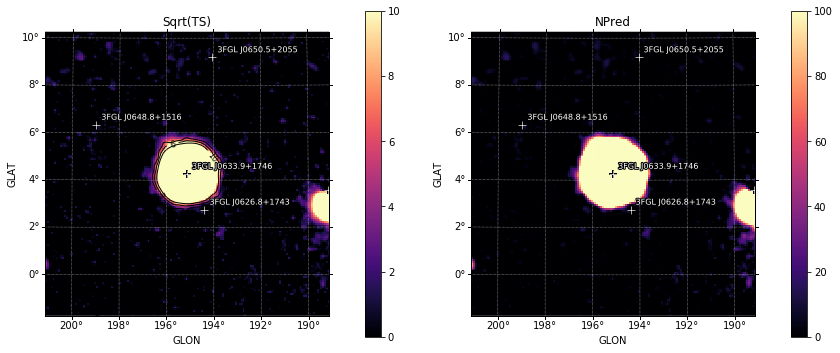

In [28]:
#tsmap_initial = gta.tsmap(prefix='TSmap_initial',make_plots=True,write_fits=True,write_npy=True)
%matplotlib inline
fig = pl.figure(figsize=(14,6))
ROIPlotter(tsmap_initial['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,6,10],vmin=0,vmax=10,subplot=121,cmap='magma')
pl.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_initial['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
pl.gca().set_title('NPred')

2018-04-01 09:35:56 INFO    GTAnalysis.residmap(): Generating residual maps
2018-04-01 09:35:56 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2018-04-01 09:36:07 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2018-04-01 09:36:12 INFO    GTAnalysis.residmap(): Finished residual maps
2018-04-01 09:36:12 INFO    GTAnalysis.residmap(): Execution time: 15.77 s


Text(0.5,1,u'Excess')

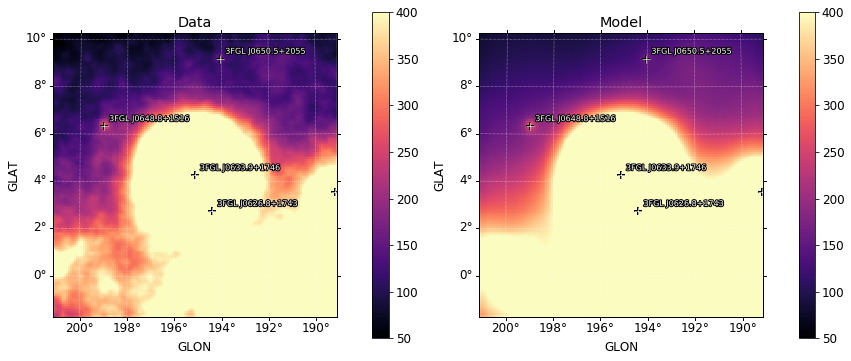

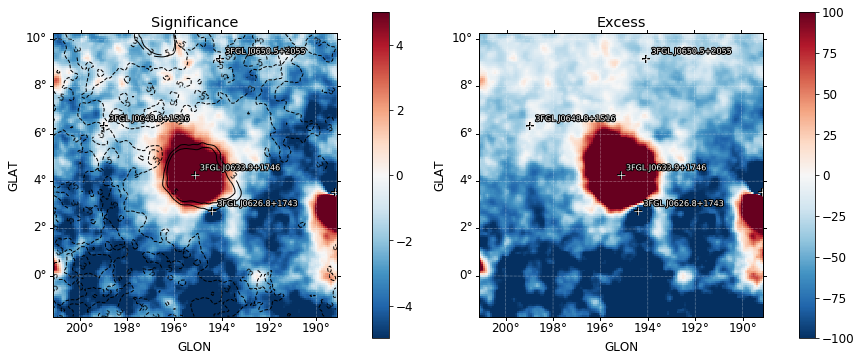

In [17]:
resid = gta.residmap('residualmap_initial',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)

fig = pl.figure(figsize=(14,6))
ROIPlotter(resid['data'],roi=gta.roi).plot(vmin=50,vmax=400,subplot=121,cmap='magma')
pl.gca().set_title('Data')
ROIPlotter(resid['model'],roi=gta.roi).plot(vmin=50,vmax=400,subplot=122,cmap='magma')
pl.gca().set_title('Model')
fig = pl.figure(figsize=(14,6))
ROIPlotter(resid['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
pl.gca().set_title('Significance')
ROIPlotter(resid['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
pl.gca().set_title('Excess')

2018-04-01 09:36:23 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/outdir/initial_00.xml...
2018-04-01 09:36:23 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/outdir/initial_01.xml...
2018-04-01 09:36:23 INFO    GTAnalysis.write_fits(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/outdir/initial.fits...
2018-04-01 09:36:24 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2018-04-01 09:36:25 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 01.
2018-04-01 09:36:28 INFO    GTAnalysis.write_roi(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/outdir/initial.npy...


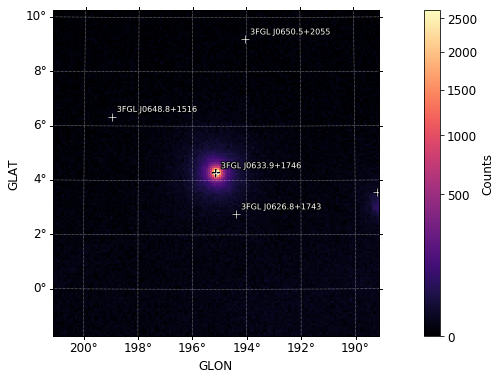

In [18]:
gta.write_roi('initial',make_plots=True,save_model_map=True)

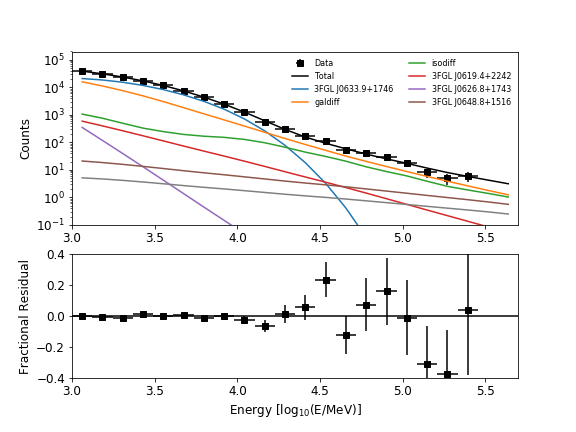

In [21]:
Image(filename='outdir/initial_counts_spectrum.png') 

In [5]:
gta.free_sources()
gta.optimize()

2018-04-01 09:02:44 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0633.9+1746     : ['Prefactor', 'Index1', 'Cutoff']
2018-04-01 09:02:44 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0626.8+1743     : ['Prefactor', 'Index']
2018-04-01 09:02:44 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0631.2+2019     : ['Prefactor', 'Index']
2018-04-01 09:02:44 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0647.8+1751     : ['Prefactor', 'Index']
2018-04-01 09:02:44 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0648.1+1606     : ['Prefactor', 'Index']
2018-04-01 09:02:44 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0648.8+1516     : ['Prefactor', 'Index']
2018-04-01 09:02:44 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0650.5+2055     : ['Prefactor', 'Index']
2018-04-01 09:02:44 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0610.6+1728     : ['norm', 'alpha', 'b

Joint fit  ['3FGL J0633.9+1746', 'galdiff']
Fitting shape 3FGL J0633.9+1746 TS: 2049664.960
Fitting shape galdiff TS: 445668.092
Fitting shape 3FGL J0619.4+2242 TS:   8536.077
Fitting shape 3FGL J0648.8+1516 TS:   1286.167
Fitting shape isodiff TS:    710.410
Fitting shape 3FGL J0650.5+2055 TS:    265.707
Fitting shape 3FGL J0659.5+1414 TS:     77.431
Fitting shape 3FGL J0700.0+1709 TS:     52.838
Fitting shape 3FGL J0605.9+2039c TS:     51.856
Fitting shape 3FGL J0609.2+2051c TS:     49.411
Fitting shape 3FGL J0631.2+2019 TS:     38.388
Fitting shape 3FGL J0648.1+1606 TS:     35.525


2018-04-01 09:03:24 INFO    GTAnalysis.optimize(): Finished
2018-04-01 09:03:24 INFO    GTAnalysis.optimize(): LogLike: 657771.634870 Delta-LogLike: 5700.216367
2018-04-01 09:03:24 INFO    GTAnalysis.optimize(): Execution time: 40.71 s


{'config': {'max_free_sources': 5,
  'npred_frac': 0.95,
  'npred_threshold': 1.0,
  'optimizer': {'init_lambda': 0.0001,
   'max_iter': 100,
   'min_fit_quality': 2,
   'optimizer': 'MINUIT',
   'retries': 3,
   'tol': 0.001,
   'verbosity': 0},
  'shape_ts_threshold': 25.0,
  'skip': []},
 'dloglike': 5700.216367430869,
 'loglike0': 652071.4185029507,
 'loglike1': 657771.6348703816}

In [6]:
gta.print_model()

2018-04-01 09:03:40 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0633.9+1746      0.001   2.867   0.00165   3.002454320.16    305474.5    *
3FGL J0626.8+1743      1.684   0.873  6.43e-07   2.70      6.50       111.4    *
3FGL J0631.2+2019      2.634   0.351  1.29e-06   2.47     44.21       183.2    *
3FGL J0647.8+1751      3.317   0.716  3.22e-07   2.70      6.10        55.5    *
3FGL J0648.1+1606      3.792   0.281  1.32e-06   1.95     39.16        80.0    *
3FGL J0648.8+1516      4.358   1.020  1.73e-05   1.71   1306.79       571.6    *
3FGL J0650.5+2055      5.040   0.726  5.67e-06   1.71    277.24       192.1    *
3FGL J0610.6+1728      5.547   0.043  1.85e-07   4.85      0.81        48.0    *
3FGL J0611.5+1957      5.715   0.187  7.75e-07   2.38      6.10        97.4    *
3FGL J0619.4+2242      5.981   3.484   6.4e-05   2.75 

In [7]:
gta.write_roi('optimize',make_plots=True,save_model_map=True)

2018-04-01 09:04:00 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/optimize_00.xml...
2018-04-01 09:04:00 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/optimize_01.xml...
2018-04-01 09:04:00 INFO    GTBinnedAnalysis.write_xml(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/optimize_02.xml...
2018-04-01 09:04:00 INFO    GTAnalysis.write_fits(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fermipy-extra/notebooks/optimize.fits...
2018-04-01 09:04:03 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2018-04-01 09:04:04 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 01.
2018-04-01 09:04:05 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 02.
2018-04-01 09:04:09 INFO    GTAnalysis.write_roi(): Writing /nfs/slac/kipac/fs1/u/mdimauro/software/fe